# Prediccion del Precio de las casas con Regression Lineal Simple

### Pasos
1. Cargar datos
2. Desarrollo
3. 

## Cargar datos

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
#
#* Lectura de Datos

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [49]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Desarrollo


In [50]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [51]:
train[['GrLivArea','SalePrice']].head(4) # estas columnas nos interesan

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

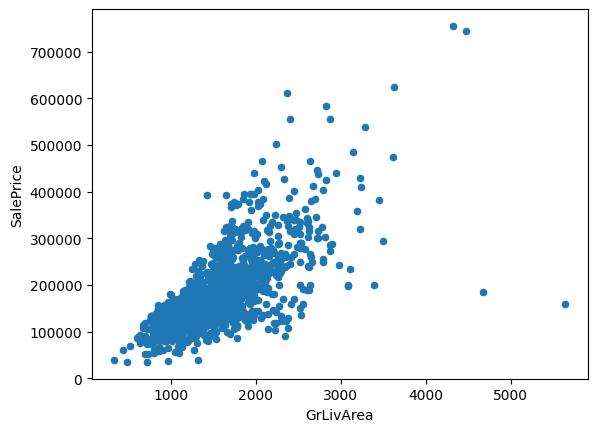

In [52]:
## Grafica
train.plot.scatter(x="GrLivArea",y="SalePrice")

#### Recta
Nuestro objetivo es realizar una recta, y para ello debemos entender:
- Datos: 
- Plano Cartesiano
- Ecuaciones

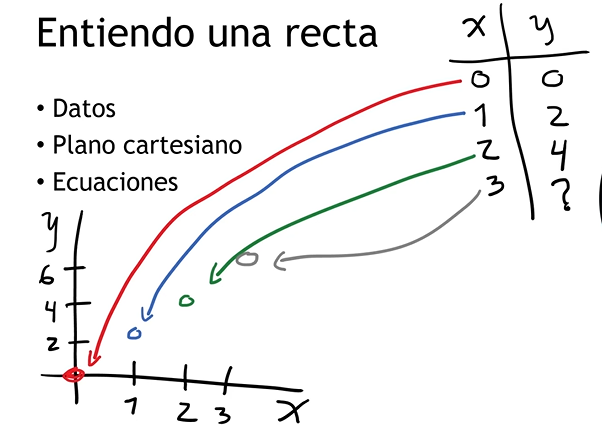
---
Hay un patron, por que cada vez aumenta 2 veces
Existe una ecuacion, que seria

"y = 2x"
#### General
Hay una formula general y es:

y= wx + b

en donde w es la pendiente y b el intercepto, estos son parametros


In [53]:
## paramtros de la recta
w = 125 #* Cuando menor es este valor, menor es la pendiente y en caso contrario es mayor
b = 0

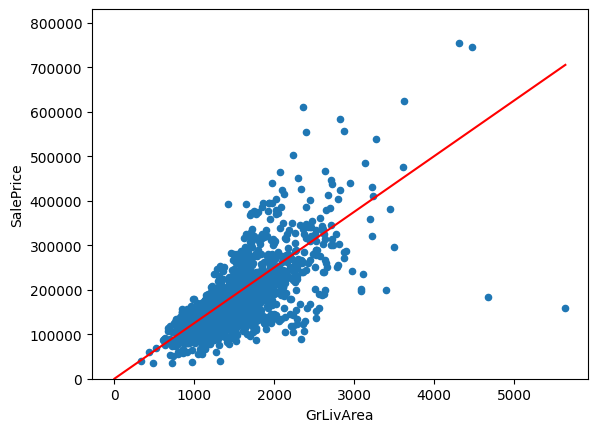

In [54]:
# puntos de la recta
x = np.linspace(1,train["GrLivArea"].max(),100) # genera un grid desde 0 hasta 100
y = w*x+b


# grafica
train.plot.scatter(x= 'GrLivArea',y='SalePrice')
plt.plot(x,y,'-r')

plt.ylim(0,train["SalePrice"].max()*1.1) # Para crear la linea, y ese 1.1 es para darle el 120 % 
plt.show()

#### Error del Modelo

Nuestro objetivo tambien es reducir el error de la linea, es decir para hacer eso, la recta debe estar en una posicion en donde este mas cercana a todos los puntos(cada punto equivale a un dato)

----
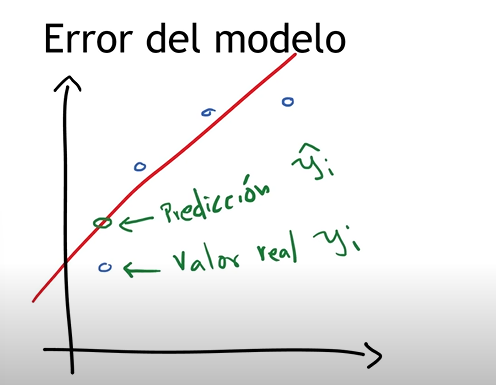
- Los puntos azules son los datos de entrenamiento
- Los puntso verdes son las predicciones

Para hallar el erro de predicion, debes restar el varlo de la prediccion del valor real(dato entrenado)

----

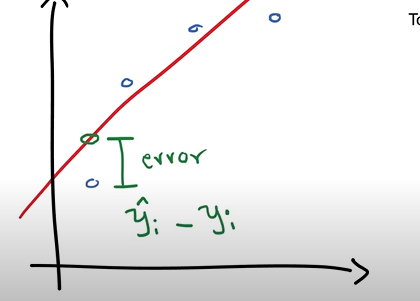

Las diferencias pueden se negativo y positivo, debemos tratar de todos sean del mismo signo, es decir todos negativos y todos positivos.

----

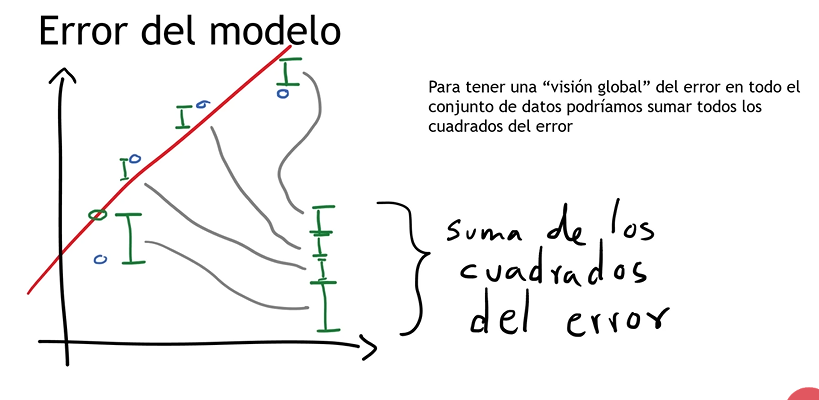

Podemos tambien promediar de todo, obtendremos el error cuadratico medio, que es lo mas adecuado.

----

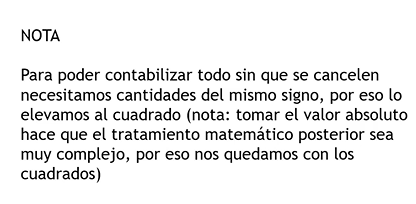

----

#### Formula de ECM
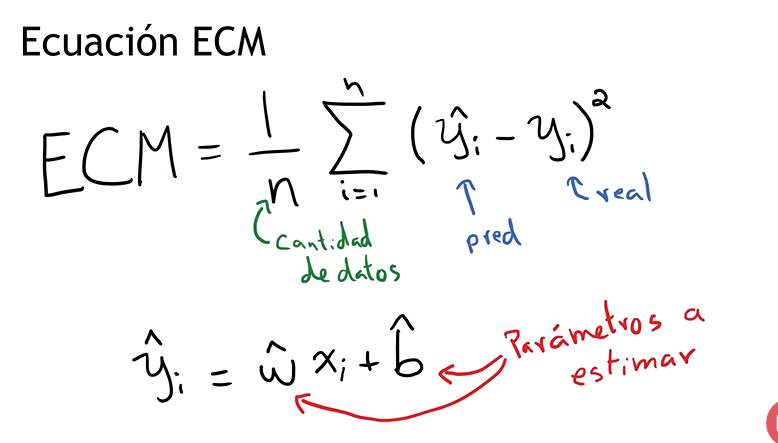

In [55]:
## Calculo de las predicciones
train["pred"] = train["GrLivArea"]*w+b # en donde w es 125 y b es 

In [59]:
## calculo de la funcion de error
### Creamos nuevas columnas de:
train["diff"] = train["pred"]-train["SalePrice"] # seria el y - y
train['cuad'] = train["diff"]*2 # lo elevamos al cuadrado
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,10500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,-47500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,-500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,149250
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,49500


In [66]:
# el error cuadratico medio
print("El error cuadratico medio es: ",train["cuad"].mean())

# grid de la funcion de error basado en m, b = 0
w = np.linspace(50, 200, 50)
grid_error = pd.DataFrame(w, columns=["w"])

grid_error.head()


El error cuadratico medio es:  17023.53287671233


,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


### Como escojer el W para minimizar el error

----

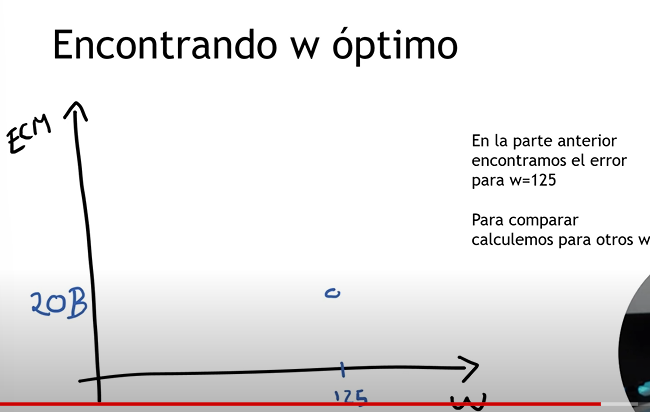

Lo que haremos es hacer una grafica, en donde y sera el ECM y x sera el W

-Primeramente tomaremos el valor del ECM cuando la x es igual a 125

-  Y probamos con varios valores de la W y asi la ECM cambia
  
" La curva es parabola

El objetivo es hallar el minimo, y debe de estar entre el 100 y 125

